# Description

## Dataset1
数据集ex1data1.txt中包含了97份数据，数据的构成如下所示：

|  | 城市面积 | 利润 |
| ----------- | ----------- | ----------- |
| 样本1 | 6.1101 | 17.592 |
| 样本2 | 5.5277 | 5.5277 |


其中第一列代表餐厅所在城市面积大小，第二列表示餐厅一年的利润，试用线性模型（一元线性回归）对两者之间的关系进行拟合。

## Dataset2

数据集ex1data2.txt中包含了47份数据，数据的构成如下所示：

|  | 面积大小 | 卧室数量 | 价格 |
| ----------- | ----------- | ----------- | ----------- |
| 样本1 | 2104 | 3 | 399900 |
| 样本2 | 1600 | 3 | 329900 |

其中第一列代表房屋占地面积，第二列代表拥有卧室数量，第三列代表房屋成交价格，试用线性模型（多元线性回归）对房屋成交价格进行拟合。

## Requirements

1. 可视化数据集的样本分布结果
2. 可视化线性回归拟合结果
3. 预测在面积大小为3.1415的城市开一家餐厅的预计利润，以及面积为2000卧室数量为1的房屋的成交价格
4. 完成实验报告

# Solution

In [88]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Dataset1

### Visualizing Data Distribution

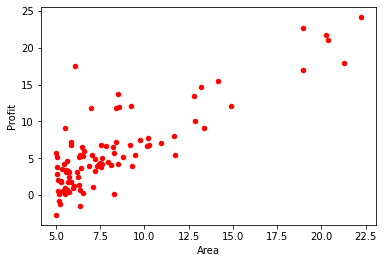

In [89]:
df1 = pd.read_csv('ex1data1.txt', sep=',', header=None)
df1 = df1.set_axis(['Area', 'Profit'], axis=1, inplace=False)

df1.plot(kind='scatter', x='Area', y='Profit', color='red')

plt.show()

### Pre-processing data

In [90]:
xs = np.array(df1['Area'])
ys = np.array(df1['Profit'])
w = 0 # parameter to learn
b = 0 # parameter to learn

### Model

In [91]:
def predict(x):
    y_pred = w * x + b
    return y_pred

def cost():
    l = 0
    for x, y in zip(np.array(df1['Area']), np.array(df1['Profit'])):
        l += (y - predict(x)) ** 2 
    return l / len(np.array(df1['Area']))
    
def gradient_w() :
    return (2 * x * (w * x + b - y))

def gradient_b() :
    return  (2  * (w * x + b - y))


### Learn

In [ ]:
for epoch in range(10000):
    for x, y in zip(np.array(df1['Area']), np.array(df1['Profit'])):
        # 计算梯度
        grad_w = gradient_w()
        grad_b = gradient_b()
        # 根据学习率更新参数
        w -= 0.0001 * grad_w # 学习率
        b -= 0.0001 * grad_b
        # print('\tgrad:', x, y, grad_w, grad_b )
    else:
        # 每个epoch打印参数及loss
        l = cost()
        print('progress:', epoch, 'w=', w,'b=',b, 'loss', l)

### Visualizing Model

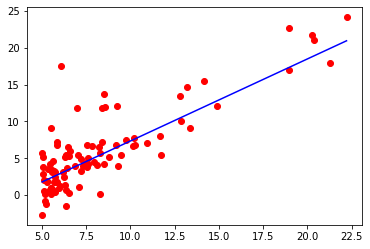

In [105]:
x_axis = np.linspace(min(xs),max(xs),100)
y_axis = predict(x_axis)

plt.plot(x_axis,y_axis,label='result',color='blue')
plt.scatter(xs,ys,color='red')

## Dataset2

### Visualizing Data Distribution

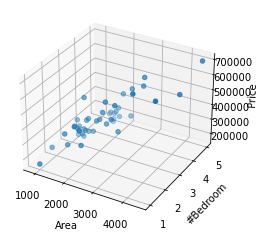

In [111]:
df1 = pd.read_csv('ex1data2.txt', sep=',', header=None)
df1 = df1.set_axis(['Area', '#Bedrooms', 'Price'], axis=1, inplace=False)

xs = np.array(df1['Area'])
ys = np.array(df1['#Bedrooms'])
zs = np.array(df1['Price'])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs, marker='o')
ax.set_xlabel('Area')
ax.set_ylabel('#Bedroom')
ax.set_zlabel('Price')

plt.show()

### Pre-processing data

In [118]:
w = np.zeros([2])
b = 0.0
X = [(xs - xs.mean())/xs.std(), (ys-ys.mean()/ys.std())] # normalizing data

[ 1.31415422e-01 -5.09640698e-01  5.07908699e-01 -7.43677059e-01
  1.27107075e+00 -1.99450507e-02 -5.93588523e-01 -7.29685755e-01
 -7.89466782e-01 -6.44465993e-01 -7.71822042e-02 -8.65999486e-04
 -1.40779041e-01  3.15099326e+00 -9.31923697e-01  3.80715024e-01
 -8.65782986e-01 -9.72625673e-01  7.73743478e-01  1.31050078e+00
 -2.97227261e-01 -1.43322915e-01 -5.04552951e-01 -4.91995958e-02
  2.40309445e+00 -1.14560907e+00 -6.90255715e-01  6.68172729e-01
  2.53521350e-01  8.09357707e-01 -2.05647815e-01 -1.27280274e+00
  5.00114703e-02  1.44532608e+00 -2.41262044e-01 -7.16966387e-01
 -9.68809863e-01  1.67029651e-01  2.81647389e+00  2.05187753e-01
 -4.28236746e-01  3.01854946e-01  7.20322135e-01 -1.01841540e+00
 -1.46104938e+00 -1.89112638e-01 -1.01459959e+00]


[array([ 1.31415422e-01, -5.09640698e-01,  5.07908699e-01, -7.43677059e-01,
         1.27107075e+00, -1.99450507e-02, -5.93588523e-01, -7.29685755e-01,
        -7.89466782e-01, -6.44465993e-01, -7.71822042e-02, -8.65999486e-04,
        -1.40779041e-01,  3.15099326e+00, -9.31923697e-01,  3.80715024e-01,
        -8.65782986e-01, -9.72625673e-01,  7.73743478e-01,  1.31050078e+00,
        -2.97227261e-01, -1.43322915e-01, -5.04552951e-01, -4.91995958e-02,
         2.40309445e+00, -1.14560907e+00, -6.90255715e-01,  6.68172729e-01,
         2.53521350e-01,  8.09357707e-01, -2.05647815e-01, -1.27280274e+00,
         5.00114703e-02,  1.44532608e+00, -2.41262044e-01, -7.16966387e-01,
        -9.68809863e-01,  1.67029651e-01,  2.81647389e+00,  2.05187753e-01,
        -4.28236746e-01,  3.01854946e-01,  7.20322135e-01, -1.01841540e+00,
        -1.46104938e+00, -1.89112638e-01, -1.01459959e+00]),
 array([-1.21098897, -1.21098897, -1.21098897, -2.21098897, -0.21098897,
        -0.21098897, -1.210988

ValueError: operands could not be broadcast together with shapes (2,47) (2,) 